# Jose Luis Ropero, Jose Luis Rueda 


## Carga de Datos 


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor


from sklearn.metrics import mean_squared_error 

In [28]:
# Cargar archivo CSV
df_train= pd.read_csv("data/train.csv")
df_test= pd.read_csv("data/test.csv")
y_test = pd.read_csv("data\sample_submission.csv")

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rueda\AppData\Local\Temp\ipykernel_17480\369568438.py:4: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv("data\sample_submission.csv")


In [29]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
# suma de valores nulos
train_missing_value = df_train.isna().sum()
train_missing_value.to_csv('train missing value.csv')

In [33]:
# mostrar las columnas con valores nulos
x = pd.read_csv('train missing value.csv')
x[x['0'] > 0]

,Unnamed: 0,0
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,872
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [34]:
#total de valores nulos y duplciados
print(f'Suma de valores nulos: {df_train.isna().sum().sum().item()}')
print(f'Valores duplicados: {df_train.duplicated().sum().item()}')

Suma de valores nulos: 7829
Valores duplicados: 0


In [35]:
#Descripciones estadisticas del conjunto de entrenamiento 
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [37]:
# Contador de valores unicos en columnas categoricas
columnas_categoricas= df_train.select_dtypes(include=["object"])
for col in columnas_categoricas:
    print(f"Valores diferentes en {col}: {df_train[col].nunique()}")

Valores diferentes en MSZoning: 5
Valores diferentes en Street: 2
Valores diferentes en Alley: 2
Valores diferentes en LotShape: 4
Valores diferentes en LandContour: 4
Valores diferentes en Utilities: 2
Valores diferentes en LotConfig: 5
Valores diferentes en LandSlope: 3
Valores diferentes en Neighborhood: 25
Valores diferentes en Condition1: 9
Valores diferentes en Condition2: 8
Valores diferentes en BldgType: 5
Valores diferentes en HouseStyle: 8
Valores diferentes en RoofStyle: 6
Valores diferentes en RoofMatl: 8
Valores diferentes en Exterior1st: 15
Valores diferentes en Exterior2nd: 16
Valores diferentes en MasVnrType: 3
Valores diferentes en ExterQual: 4
Valores diferentes en ExterCond: 5
Valores diferentes en Foundation: 6
Valores diferentes en BsmtQual: 4
Valores diferentes en BsmtCond: 4
Valores diferentes en BsmtExposure: 4
Valores diferentes en BsmtFinType1: 6
Valores diferentes en BsmtFinType2: 6
Valores diferentes en Heating: 6
Valores diferentes en HeatingQC: 5
Valores d

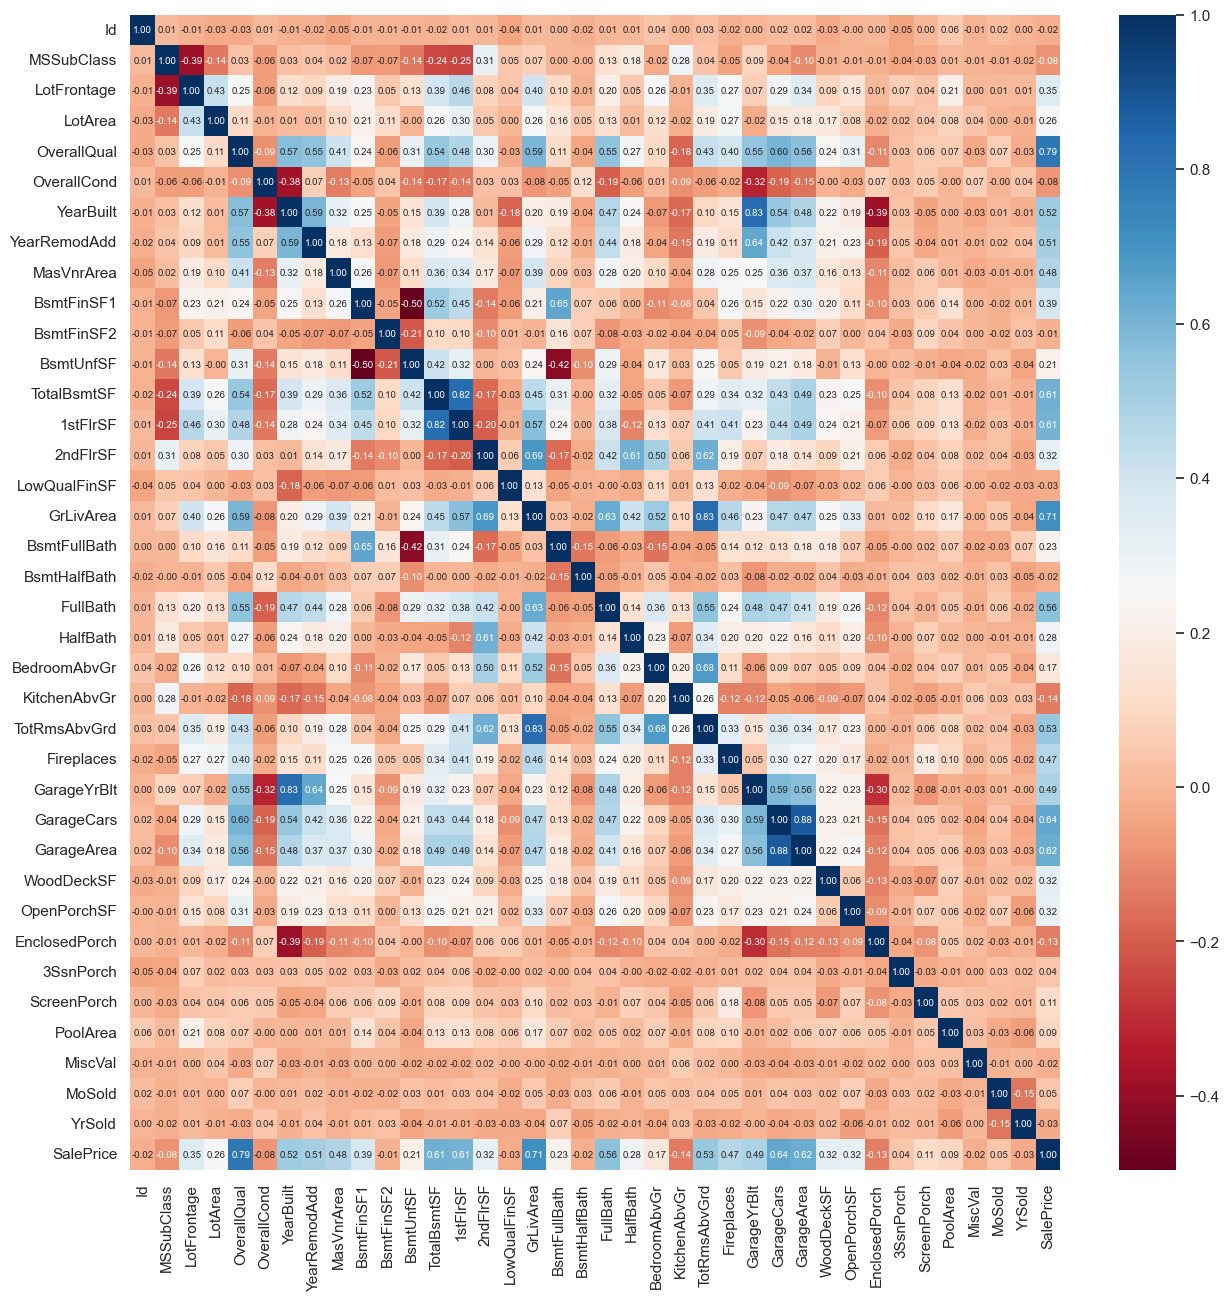

[]

In [38]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set_theme(rc={"figure.figsize": (15, 15)})
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", annot_kws={"size": 7})
        plt.show()
    return drop_list

high_correlated_cols(df_train, plot=True)

In [39]:
eliminar = ["Street","LandContour", "Utilities", "LandSlope", "Condition2", "RoofMatl", "ExterCond","BsmtCond", "BsmtFinType2","Heating", "CentralAir","Functional", "GarageQual", "GarageCond", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "MasVnrType"]

df_train.drop(columns= eliminar, inplace=True)
df_test.drop(columns= eliminar, inplace=True)


# df_train.drop(columns=['Id', 'MasVnrType', 'Alley', "FireplaceQu", 'PoolQC', 'Fence', 'MiscFeature' ], inplace=True)
# df_test.drop(columns=['Id', 'MasVnrType', 'Alley' , "FireplaceQu", 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [40]:
df_test.shape

(1459, 60)

### Manejo de Datos Faltantes 

In [41]:
# Paso 1: Separar las columnas
columnas_numericas = df_train.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = df_train.select_dtypes(include=['object']).columns

# Paso 2: Imputar los valores faltantes para las columnas numéricas utilizando la mediana
ajuste_mediana = SimpleImputer(strategy='median')
df_train[columnas_numericas] = ajuste_mediana.fit_transform(df_train[columnas_numericas])

# Paso 3: Imputar valores faltantes para columnas categóricas usando most_frequent
ajuste_frecuentes = SimpleImputer(strategy='most_frequent')
df_train[columnas_categoricas] = ajuste_frecuentes.fit_transform(df_train[columnas_categoricas])

In [42]:
# Paso 1: Separar las columnas
columnas_numericas = df_test.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = df_test.select_dtypes(include=['object']).columns

# Paso 2: Imputar los valores faltantes para las columnas numéricas utilizando la mediana
ajuste_mediana = SimpleImputer(strategy='median')
df_test[columnas_numericas] = ajuste_mediana.fit_transform(df_test[columnas_numericas])

# Paso 3: Imputar valores faltantes para columnas categóricas usando most_frequent
ajuste_frecuentes = SimpleImputer(strategy='most_frequent')
df_test[columnas_categoricas] = ajuste_frecuentes.fit_transform(df_test[columnas_categoricas])

In [43]:
encoder = LabelEncoder()
# categorical_columns = [
#     'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
#     'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
#     'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
#     'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
#     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
#     'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 
#     'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 
#     'SaleCondition'
# ]

categorical_columns = [
    'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 
    'HouseStyle', 'RoofStyle',  'Exterior1st', 'Exterior2nd', 
    'ExterQual', 'Foundation', 'BsmtQual',  
    'BsmtExposure', 'BsmtFinType1',  'HeatingQC', 'Electrical', 'KitchenQual',  'GarageType', 
    'GarageFinish', 'PavedDrive', 'SaleType', 
    'SaleCondition'
]

for column in categorical_columns:
    df_train[column] = encoder.fit_transform(df_train[column])
    
for column in categorical_columns:
    df_test[column] = encoder.fit_transform(df_test[column]) 

In [44]:
x = df_train.iloc[ : , :-1] #datos de entrenamiento
y = df_train.iloc[ : , -1] #precio de venta

In [45]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,3,65.0,8450.0,3,4,5,2,0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4
1,2.0,20.0,3,80.0,9600.0,3,2,24,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4
2,3.0,60.0,3,68.0,11250.0,0,4,5,2,0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4
3,4.0,70.0,3,60.0,9550.0,0,0,6,2,0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0
4,5.0,60.0,3,84.0,14260.0,0,2,15,2,0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3,62.0,7917.0,3,4,8,2,0,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8,4
1456,1457.0,20.0,3,85.0,13175.0,3,4,14,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8,4
1457,1458.0,70.0,3,66.0,9042.0,3,4,6,2,0,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8,4
1458,1459.0,20.0,3,68.0,9717.0,3,4,12,2,0,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8,4


In [46]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

Estandarizamos 

In [47]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [48]:
y_df = y.to_frame()
y = scaler.fit_transform(y_df)

División de entrenamiento para entrenamiento y validación 

In [49]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, shuffle=True,random_state=42)

Modelos de machine 


In [50]:
linearRegression= LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
decisionTreeRegresor = DecisionTreeRegressor(max_depth=300, min_samples_split=10, min_samples_leaf=10, random_state=42)
randomForest = RandomForestRegressor(max_depth= 60, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 51, random_state=42)

In [51]:
linearRegression.fit(x_train, y_train)
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)
svr.fit(x_train, y_train)
decisionTreeRegresor.fit(x_train, y_train)
randomForest.fit(x_train, y_train)

c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=60, n_estimators=51, random_state=42)

In [52]:

def evaluate_models(models, models_names, x_train, y_train, x_valid, y_valid):
    # Calcular predicciones y errores cuadrados para cada modelo
    squared_errors = []
    for model in models:
        y_pred = model.predict(x_valid)
        mse = mean_squared_error(y_valid, y_pred)
        squared_errors.append(f'{mse * 100:.2f}%')  # Formatear como porcentaje

    # Calcular puntuaciones de entrenamiento y validación
    train_score = [model.score(x_train, y_train) for model in models]
    valid_score = [model.score(x_valid, y_valid) for model in models]

    # Diferencia entre las puntuaciones de entrenamiento y validación
    ratio = []
    for train, valid in zip(train_score, valid_score):
        result = train - valid
        ratio.append(f'{result * 100:.2f}%')

    # Evaluar el estado del modelo
    rate = []
    for train, valid in zip(train_score, valid_score):
        if train <= 0.65 and valid <= 0.65:
            rate.append('malo')
        elif train > valid * 1.10:
            rate.append('overfite')
        elif train > 0.65 and train < 0.80 and valid > 0.65 and valid < 0.80:
            rate.append('medio')
        elif train >= 0.80 and valid >= 0.80 and train < 1.00 and valid < 1.00:
            rate.append('bueno')
        elif train >= 0.80 and valid < 0.80:
            rate.append('Alto train, Bajo test')
        else:
            rate.append('unknown')

    # Crear DataFrame con los resultados
    model_score = pd.DataFrame({
        'Modelo': models_names,
        'Score Entrenamiento': [f'{round(score * 100, 2)}%' for score in train_score],
        'Score Validacion': [f'{round(score * 100, 2)}%' for score in valid_score],
        'Difererencia': ratio,
        'Evaluacion': rate,
        'MSE': squared_errors
    })

    return model_score

# Ejemplo de uso
models = [linearRegression, lasso, ridge, svr, decisionTreeRegresor, randomForest]
models_names = ['RegresionLineal','Lasso', 'Rigde', 'Svr','ArbolesDecisionRegresion','RandomForestRegresion']
model_score = evaluate_models(models, models_names, x_train, y_train, x_valid, y_valid)

# Mostrar resultado
model_score

,Modelo,Score Entrenamiento,Score Validacion,Difererencia,Evaluacion,MSE
0,RegresionLineal,83.82%,84.56%,-0.74%,bueno,18.78%
1,Lasso,0.0%,-0.09%,0.09%,malo,121.73%
2,Rigde,83.82%,84.56%,-0.74%,bueno,18.78%
3,Svr,92.13%,80.86%,11.27%,overfite,23.28%
4,ArbolesDecisionRegresion,87.38%,79.5%,7.88%,"Alto train, Bajo test",24.93%
5,RandomForestRegresion,97.86%,88.93%,8.93%,overfite,13.46%


                    Model      RMSE
0            SGDRegressor  0.475612
1                   Lasso  0.973001
2                   Ridge  0.466049
3              ElasticNet  0.823232
4                     SVR  0.431004
5     KNeighborsRegressor  0.483194
6   DecisionTreeRegressor  0.555563
7   RandomForestRegressor  0.380445
8        BaggingRegressor  0.406771
9     ExtraTreesRegressor  0.404618
10      AdaBoostRegressor  0.450872


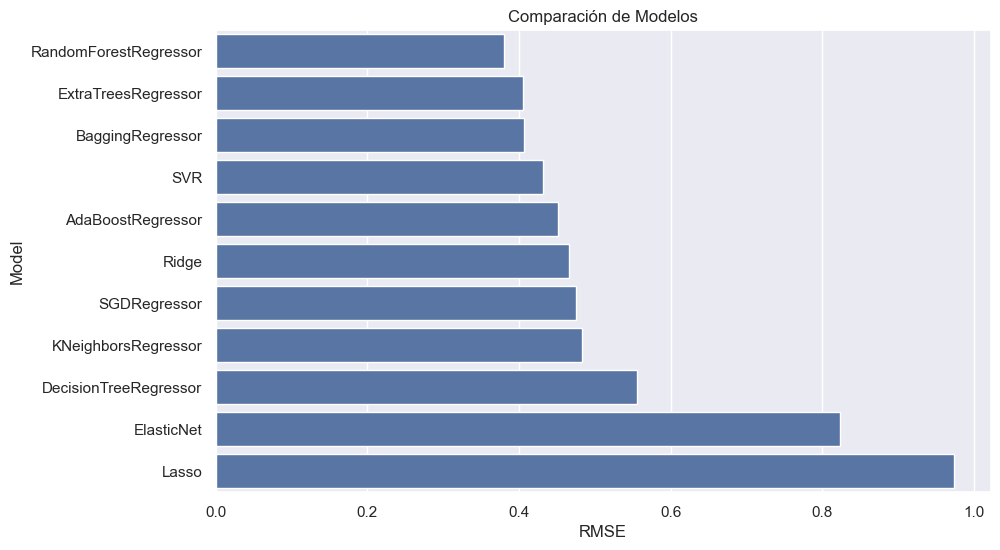

In [385]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

models = [
    ('SGDRegressor', SGDRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('ElasticNet', ElasticNet()),
    ('SVR', SVR()),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('BaggingRegressor', BaggingRegressor()),
    ('ExtraTreesRegressor', ExtraTreesRegressor()),
    ('AdaBoostRegressor', AdaBoostRegressor())
]

# Evaluar modelos
results = []
for name, model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    results.append((name, np.sqrt(-scores.mean())))

# Mostrar resultados
results_df = pd.DataFrame(results, columns=['Model', 'RMSE'])
print(results_df)

# Visualizar resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df.sort_values(by='RMSE'))
plt.title('Comparación de Modelos')
plt.show()

## Validación Cruzada


In [386]:
RandomForest = RandomForestRegressor()

In [387]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

if len(y.shape) > 1 and y.shape[1] == 1:
    y = y.ravel()

# Lista de modelos
models = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Support Vector Regression (SVR)": SVR()
}

# Evaluar cada modelo con validación cruzada
for name, model in models.items():
    # Calcular el MSE
    mse_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    mean_mse = -mse_scores.mean()
    rmse = np.sqrt(mean_mse)
    std_mse = mse_scores.std()
    
    # Calcular el R^2
    r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()
    
    print(f"Modelo: {name}")
    print(f"Scores de validación cruzada (negativo MSE): {mse_scores}")
    print(f"Promedio MSE: {mean_mse:.4f}, RMSE: {rmse:.4f}, Desviación estándar MSE: {std_mse:.4f}")
    print(f"Scores de validación cruzada (R^2): {r2_scores}")
    print(f"Promedio R^2: {mean_r2:.4f}, Desviación estándar R^2: {std_r2:.4f}")
    print("-" * 50)


Modelo: Random Forest
Scores de validación cruzada (negativo MSE): [-0.1129372  -0.15952685 -0.15637397 -0.0933997  -0.214006  ]
Promedio MSE: 0.1472, RMSE: 0.3837, Desviación estándar MSE: 0.0419
Scores de validación cruzada (R^2): [0.87342967 0.8469575  0.87502815 0.88205045 0.80918074]
Promedio R^2: 0.8573, Desviación estándar R^2: 0.0269
--------------------------------------------------
Modelo: Linear Regression
Scores de validación cruzada (negativo MSE): [-0.11256791 -0.19704312 -0.18272714 -0.12378243 -0.36372024]
Promedio MSE: 0.1960, RMSE: 0.4427, Desviación estándar MSE: 0.0900
Scores de validación cruzada (R^2): [0.87158023 0.81089431 0.84792783 0.8459317  0.65795279]
Promedio R^2: 0.8069, Desviación estándar R^2: 0.0769
--------------------------------------------------
Modelo: Support Vector Regression (SVR)
Scores de validación cruzada (negativo MSE): [-0.13729154 -0.15298482 -0.25042803 -0.08882598 -0.32171505]
Promedio MSE: 0.1902, RMSE: 0.4362, Desviación estándar MSE

In [388]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Lista de modelos
models = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Support Vector Regression (SVR)": SVR()
}

# Definir las métricas
scorers = {
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

# Evaluar cada modelo con las métricas definidas
for name, model in models.items():
    print(f"Modelo: {name}")
    
    for metric_name, scorer in scorers.items():
        # Realizar la validación cruzada para cada métrica
        scores = cross_val_score(model, x, y, cv=5, scoring=scorer)
        
        if metric_name == 'MSE':
            # Si es MSE, calculamos RMSE
            mean_score = scores.mean()
            rmse = np.sqrt(mean_score)
            print(f"Scores de validación cruzada ({metric_name}): {scores}")
            print(f"Promedio: {mean_score:.4f}, RMSE: {rmse:.4f}")
        else:
            # Para MAE y R2
            mean_score = scores.mean()
            print(f"Scores de validación cruzada ({metric_name}): {scores}")
            print(f"Promedio: {mean_score:.4f}")
        
        print("-" * 50)


Modelo: Random Forest
Scores de validación cruzada (MSE): [0.10957957 0.15743839 0.1460138  0.0949292  0.18723419]
Promedio: 0.1390, RMSE: 0.3729
--------------------------------------------------
Scores de validación cruzada (MAE): [0.22360411 0.21872024 0.21977295 0.20870106 0.23806687]
Promedio: 0.2218
--------------------------------------------------
Scores de validación cruzada (R2): [0.87423373 0.85348423 0.8755467  0.88285348 0.79239967]
Promedio: 0.8557
--------------------------------------------------
Modelo: Linear Regression
Scores de validación cruzada (MSE): [0.11265623 0.19701802 0.18271933 0.12375358 0.36366415]
Promedio: 0.1960, RMSE: 0.4427
--------------------------------------------------
Scores de validación cruzada (MAE): [0.25103312 0.27650924 0.25175643 0.23956722 0.27439178]
Promedio: 0.2587
--------------------------------------------------
Scores de validación cruzada (R2): [0.87158023 0.81089431 0.84792783 0.8459317  0.65795279]
Promedio: 0.8069
-----------

## Mejores Hiperparamaetros

### Random Forest

In [53]:
# Optimización de Hiperparámetros para el mejor modelo (por ejemplo, RandomForestRegressor)
profudidad = list(range(10, 101, 10))
param_grid = {
    'n_estimators': list(range(1, 301, 50)),
    'max_depth': profudidad,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'random_state' : [42]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Mejor modelo y parámetros
best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor RMSE: {np.sqrt(-grid_search.best_score_)}")

c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores parámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 151, 'random_state': 42}
Mejor RMSE: 0.3868763148194513


In [ ]:
# Definir el rango de hiperparámetros
param_grid = {
    'n_estimators': list(range(50, 501, 50)),
    'max_depth': list(range(10, 101, 10)),
    'min_samples_split': list(range(2, 51, 5)),
    'min_samples_leaf': list(range(1, 11, 1))
}

# Inicializar variables para almacenar los mejores parámetros y el mejor RMSE
best_params = None
best_rmse = float('inf')

# Iterar sobre todos los posibles valores de los hiperparámetros
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                # Crear y entrenar el modelo
                model = RandomForestRegressor(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    n_jobs=-1
                )
                model.fit(x_train, y_train)
                
                # Evaluar el modelo en el conjunto de validación
                y_pred = model.predict(x_valid)
                rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
                
                # Actualizar los mejores parámetros si se encuentra un mejor RMSE
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

# Mostrar los mejores parámetros y el mejor RMSE
print(f"Mejores parámetros: {best_params}")
print(f"Mejor RMSE: {best_rmse}")

# Entrenar el modelo final con los mejores parámetros en todo el conjunto de entrenamiento
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    n_jobs=-1
)
best_model.fit(x_train, y_train)

c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

KeyboardInterrupt: 